# Data Analysis: European Social Survey (ESS) | Media Use | Germany

NOTE: Please reference 'media-use-germany-data-prep.ipynb' and 'README.md' for information about the data source, data documentaion and further notes.

NOTE: When interpreting the following findings, please keep in mind that features like political interest, media use etc. are based on a self-assesment of the respondents within an interview. Effects like common-method variance might be present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## Step 0: Load Data

In [2]:
df = pd.read_csv('data/EuropeanSocialSurvey_Round_1-5_Germany_clean.csv', index_col=0)
df.head()

,cseqno,essround,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,ppltrst,pplfair,...,imptrad,impfun,prtvde1_all,prtvde2_all,prtclde_all,prtmbde_all,marital_all,lnghom1_all,lnghom2_all,hincome_approx
0,66876,1,7.0,0.0,0.0,66.0,0.0,66.0,0,5,...,6.0,1.0,66.0,66.0,66.0,66.0,4.0,GER,000,1.0
1,66877,1,5.0,2.0,6.0,0.0,2.0,2.0,6,6,...,1.0,1.0,2.0,4.0,66.0,66.0,4.0,GER,000,2.0
2,66878,1,5.0,2.0,7.0,2.0,1.0,1.0,0,0,...,1.0,3.0,66.0,66.0,6.0,66.0,1.0,GER,000,2.0
3,66879,1,4.0,2.0,6.0,2.0,2.0,1.0,2,3,...,3.0,3.0,2.0,8.0,2.0,66.0,1.0,GER,000,3.0
4,66880,1,3.0,0.0,0.0,66.0,1.0,1.0,0,7,...,5.0,5.0,66.0,66.0,66.0,66.0,1.0,GER,000,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14401 entries, 0 to 14486
Columns: 118 entries, cseqno to hincome_approx
dtypes: float64(37), int64(79), object(2)
memory usage: 13.1+ MB


## Step 1: Explore Data

### Step 1.1 Explore Media Use

Features concerning media use:

* rdpol: Radio listening, news/politics/current affairs on average weekday
* rdtot: Radio listening, total time on average weekday
* tvpol: TV watching, news/politics/current affairs on average weekday
* tvtot: TV watching, total time on average weekday
* nwsppol: Newspaper reading, politics/current affairs on average weekday
* nwsptot: Newspaper reading, total time on average weekday

Encoding:

0 = No time at all || 1 = Less than 0,5 hour || 2 = 0,5 hour to 1 hour || 3 = More than 1 hour, up to 1,5 hours || 4 = More than 1,5 hours, up to 2 hours || 5 = More than 2 hours, up to 2,5 hours || 6 = More than 2,5 hours, up to 3 hours || 7 = More than 3 hours || 66 = Not applicable || 77 = Refusal || 88 = Don't know || 99 = No answer


In [4]:
def plot_media_use_by(df, medium, by):
    '''
    INPUT
    df - Pandas dataframe
    medium - Medium, which columns should be plotted ({'nwsp': 'Newspaper', 'tv': 'Television', 'rd': 'Radio'})
        
    This function
    1. removes answeres 'Not applicable', 'Refusal', 'Don't know', 'No answer'
    2. plots the counts of answers for media use in total and for news/politics/current by the given "by" parameter
    '''
    mediums = {'nwsp': 'Newspaper', 'tv': 'Television', 'rd': 'Radio'}
    df_tot = df[df[medium+'tot'].isin(range(0,8))]
    df_pol = df[df[medium+'pol'].isin(range(0,8))]
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    sns.heatmap(data=df_tot.groupby([by, medium+'tot']).size().unstack(fill_value=0), ax=ax1)
    sns.heatmap(data=df_pol.groupby([by, medium+'pol']).size().unstack(fill_value=0), ax=ax2)
    ax1.set_title(mediums[medium] + ' (total time on average weekday) - Answer Counts by ' + by)
    ax2.set_title(mediums[medium] + ' (politics/current affairs on average weekday) - Answer Counts by' + by)
    plt.show()

In [14]:
def plot_media_use_by_gender(df, medium):
    '''
    INPUT
    df - Pandas dataframe
    medium - Medium, which columns should be plotted ({'nwsp': 'Newspaper', 'tv': 'Television', 'rd': 'Radio'})
        
    This function
    1. removes answeres 'Not applicable', 'Refusal', 'Don't know', 'No answer'
    2. plots the counts of answers for media use in total and for news/politics/current by gender
    '''
    mediums = {'nwsp': 'Newspaper', 'tv': 'Television', 'rd': 'Radio'}
    df_tot = df[df[medium+'tot'].isin(range(0,8))]
    df_pol = df[df[medium+'pol'].isin(range(0,8))]
    
   
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    p1 = ax1.bar(np.arange(8), height=df_tot[df_tot['gndr']==1][medium+'tot'].value_counts().sort_index())
    p2 = ax1.bar(np.arange(8), height=df_tot[df_tot['gndr']==2][medium+'tot'].value_counts().sort_index(), bottom=df_tot[df_tot['gndr']==1][medium+'tot'].value_counts().sort_index())
    ax1.legend((p1[0], p2[0]), ('Men', 'Women'))
    
    p3 = ax2.bar(np.arange(8), height=df_pol[df_pol['gndr']==1][medium+'pol'].value_counts().sort_index())
    p4 = ax2.bar(np.arange(8), height=df_pol[df_pol['gndr']==2][medium+'pol'].value_counts().sort_index(), bottom=df_pol[df_pol['gndr']==1][medium+'pol'].value_counts().sort_index())
    ax2.legend((p3[0], p4[0]), ('Men', 'Women'))

    ax1.set_title(mediums[medium] + ' (total time on average weekday) - Answer Counts by Gender')
    ax2.set_title(mediums[medium] + ' (politics/current affairs on average weekday) - Answer Counts by Gender')

    plt.show()

**Explore Media Use By Round/ Time (essround)**

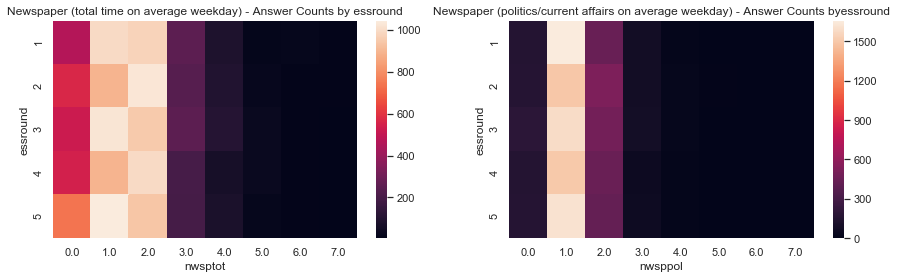

In [6]:
plot_media_use_by(df, 'nwsp', 'essround')

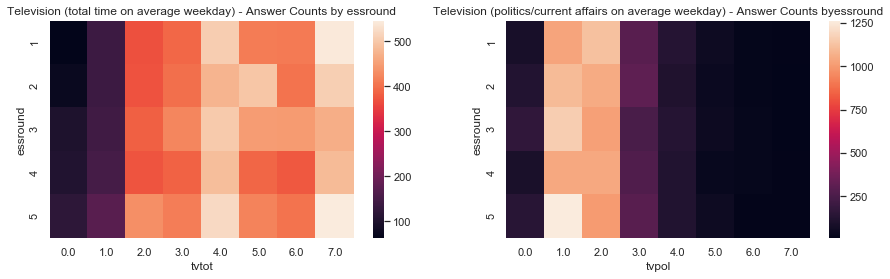

In [7]:
plot_media_use_by(df, 'tv', 'essround')

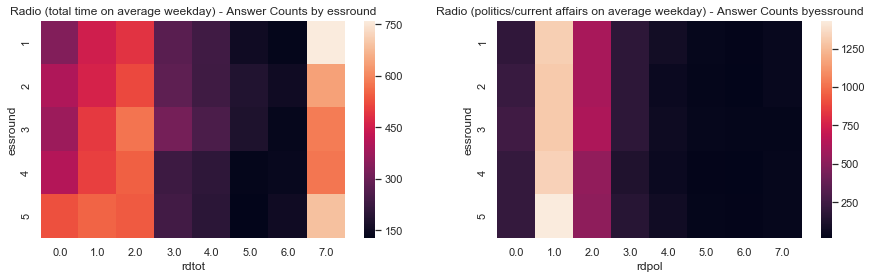

In [8]:
plot_media_use_by(df, 'rd', 'essround')

*Explore Media Use By Round/ Time (essround) - Discussion*
* NOTE: The plots use differnet scales, the colors are only comparable within one plot. We can still compare the different patterns and trends though.
* The typical range of average time spend with newspaper is much tighter than for television and radio.
* For all three mediums the color gradient for the answer code "0.0" shows an increase of people answering they don't use the medium at all (total time).
* Even though the typical total time ranges differ between the mediums, the typical time range for consuming politics seems ot be "1 = Less than 0,5 hour" for all of them (for television closely followed by "2 = 0,5 hour to 1 hour").

**Explore Media Use By Political Interest (polintr)**

Encoding: 1 = Very interested || 2 = Quite interested || 3 = Hardly interested || 4 = Not at all interested || 7 = Refusal || 8 = Don't know || 9 = No answer

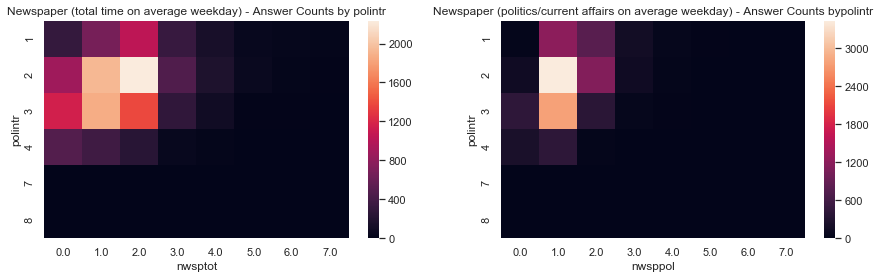

In [9]:
plot_media_use_by(df, 'nwsp', 'polintr')

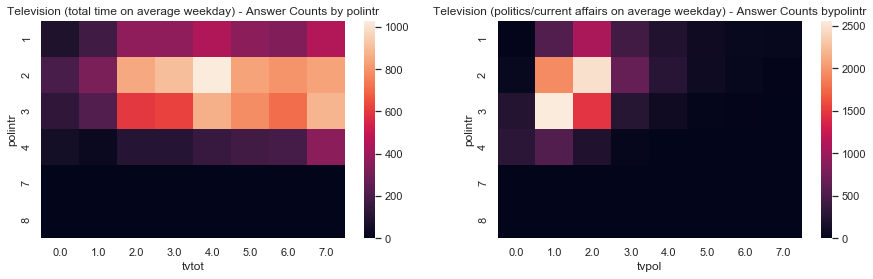

In [10]:
plot_media_use_by(df, 'tv', 'polintr')

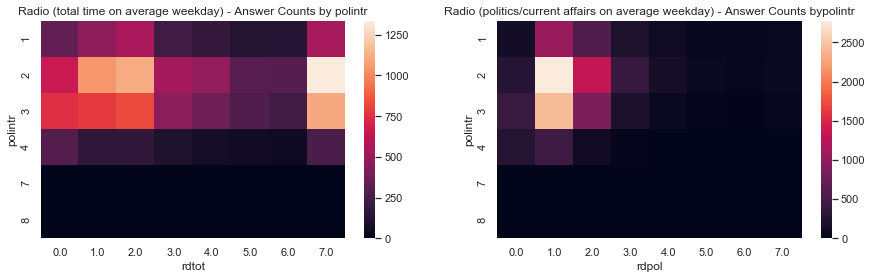

In [11]:
plot_media_use_by(df, 'rd', 'polintr')

*Explore Media Use By Political Interest - Discussion*
* Even within the group of politically interested (1-2), the media use for politics does not seem to be much higher than category 1-2.
* On the other hand, a lot of the hardly interested (3) still report a (week)daily political media use (especially category 1) over all mediums.

**Explore Media Use By Gender (gndr)**

Encoding: 1 = Male || 2 = Female || 9 = No answer

In [12]:
# Check that gender is equally distributed within the answeres
df['gndr'].value_counts()

2    7217
1    7184
Name: gndr, dtype: int64

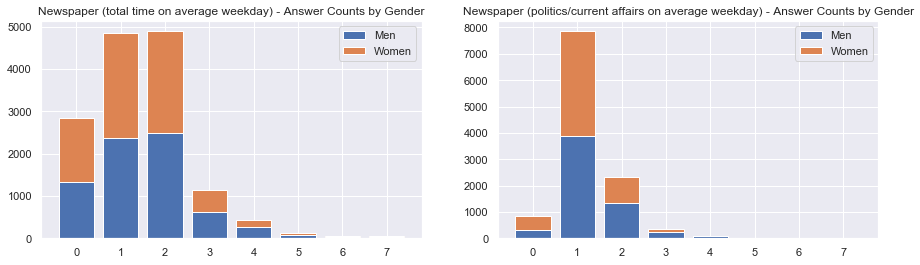

In [15]:
plot_media_use_by_gender(df, 'nwsp')

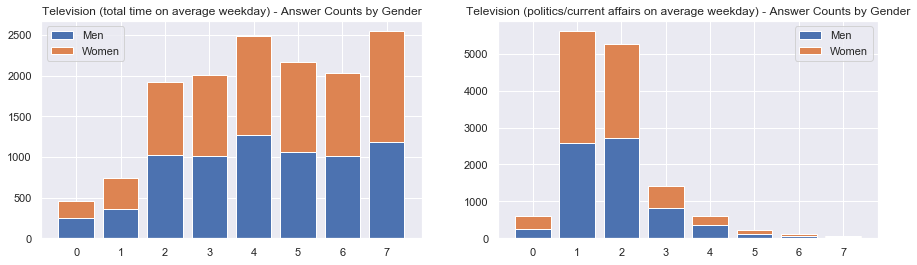

In [16]:
plot_media_use_by_gender(df, 'tv')

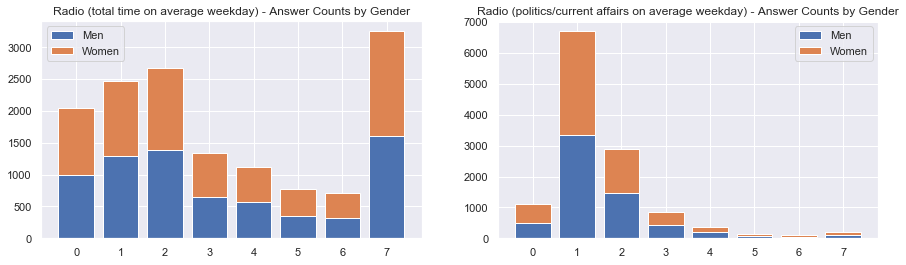

In [17]:
plot_media_use_by_gender(df, 'rd')

*Explore Media Use By Gender (gndr) - Discussion*
* The plots don't show drastic differences between gender
* The category "0" (No time at all) seemd to have been picked a bit more often by women than by men, except for "television total"
* Concerning the total media use for both genders, newspaper shows the highest amount of "No time at all" answers (>3.500) followed by radio (~2000) and finally tv (<500)

In [18]:
df['agea'].max()

999

## Step 2: Find Answers

### Possible Questions
News publishers have to understand which people they don't reach and try to address especially those, so that they can act in thei can enable all people and secure business:

1. Does the trust in politics and political instituions correlate with the trust in media?
2. Does the trust in media correlate with wether a person has voted in the last election?
3. Does the feeling of politics beeing to complicated and the media usage correspond?
4. Do poeple how consume media regulatly participate more in political activities?
5. Which demographics correlate with a low media usage?
6. Does the  level of education of the parents correlate with the media usage of the respondent?
7. Are respondents who affirm the importance to follow traditions and customs more likely to consume politics in the newspaper than respondents who disagree?
8. What factors about an individual contributed to total newspaper use? (Prediction)
9. Which cluster of the poulation are more or less likely to a strong political media use? (Clustering)

    
### Step 2 - Question 1: Traditionalism & Newspaper Use
Are respondents who affirm the importance to follow traditions and customs more likely to read newspapers than respondents who disagree?

*Feature imptrad:*
* imptrad: "Important to follow traditions and customs"
* Encoding: 1 = Very much like me || 2 = Like me || 3 = Somewhat like me || 4 = A little like me || 5 = Not like me || 6 = Not like me at all || 7 = Refusal || 8 = Don't know || 9 = No answer


In [19]:
# Create subset of the data holding the relevant features
dfq1 = df[['nwsptot', 'imptrad']]
dfq1.head()

,nwsptot,imptrad
0,0.0,6.0
1,2.0,1.0
2,1.0,1.0
3,2.0,3.0
4,1.0,5.0


In [24]:
# Remove rows where no answer has been provided for nwsppol or imptrad
nwsptot_no_answer = (66, 77, 88, 99)
imptrad_no_answer = (7, 8, 9)

dfq1 = dfq1[np.invert(dfq1['nwsptot'].isin(nwsptot_no_answer) | dfq1['imptrad'].isin(imptrad_no_answer))]

dfq1.head()

,nwsptot,imptrad
0,0.0,6.0
1,2.0,1.0
2,1.0,1.0
3,2.0,3.0
4,1.0,5.0


Text(0.5, 1.0, 'Linear regression of traditionalism (independent) and newspaper user (dependent)')

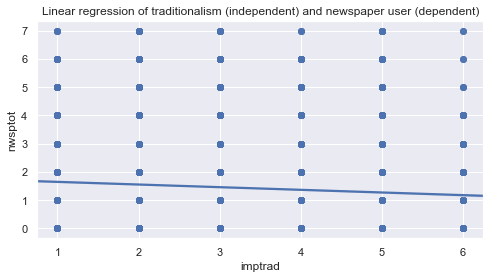

In [25]:
# Plot linear regression (independent variable: traditionalism, dependen variable: newspaper use)
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.regplot(x='imptrad', y='nwsptot', data=dfq1)
ax.set_title("Linear regression of traditionalism (independent) and newspaper user (dependent)")

In [26]:
# Create dummy variables as preparation for the correlation matrix
dfq1a = pd.get_dummies(dfq1, columns=['nwsptot', 'imptrad'])

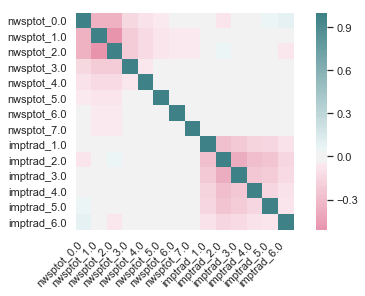

In [27]:
# Plot correlation matrix
ax = sns.heatmap(dfq1a.corr(), center=0, square=True, cmap=sns.diverging_palette(0, 200, n=150))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

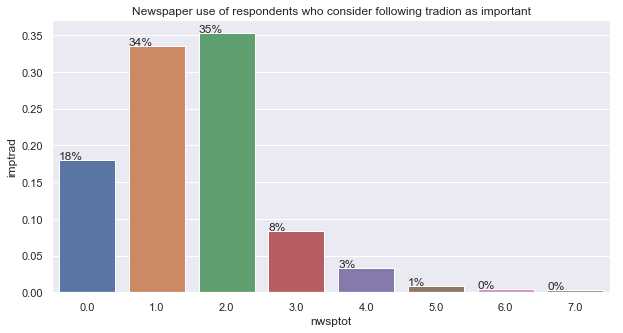

In [39]:
sns.set(rc={'figure.figsize':(10,5)})

# Aggregate answers from traditional minded respondents (1 = Very much like me || 2 = Like me || 3 = Somewhat like me || 4 = A little like me) and calculate the share in each response category
dfq1b = dfq1[dfq1['imptrad'].isin([1,2,3,4])].groupby('nwsptot', as_index=False).count().sort_index()
dfq1b['imptrad'] = dfq1b['imptrad'].apply(lambda x: x/dfq1b['imptrad'].sum())

# Plot the newspaper use
ax = sns.barplot(x='nwsptot', y='imptrad', data=dfq1b)
ax.set_title("Newspaper use of respondents who consider following tradion as important")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height+ 0.001))

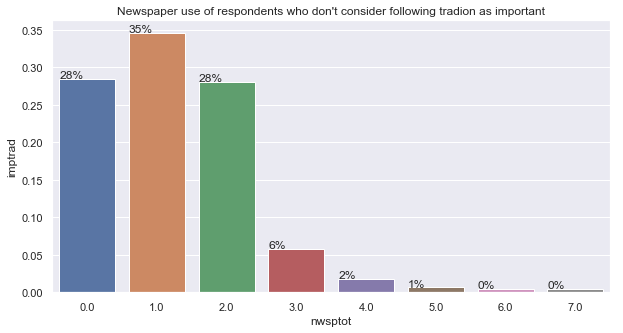

In [40]:
# Aggregate answers from traditional minded respondents (5 = Not like me || 6 = Not like me at all) and calculate the share in each response category
dfq1c= dfq1[dfq1['imptrad'].isin([5,6])].groupby('nwsptot', as_index=False).count().sort_index()
dfq1c['imptrad'] = dfq1c['imptrad'].apply(lambda x: x/dfq1c['imptrad'].sum())

# Plot the newspaper use
ax = sns.barplot(x='nwsptot', y='imptrad', data=dfq1c)
ax.set_title("Newspaper use of respondents who don't consider following tradion as important")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height+ 0.001))

*Step 2 - Question 1: Traditionalism & Newspaper Use - Conclusion*
* The first plot only showed a very flat regression line, indicating that there is no strong connection between the respondents subjective importance of tradition and the intensity if their newspaper use.
* This observation was confirmed by the correlation plot, which even shows weaker signs of a connection.
* Comparing the share of newpaper use intensities between the two groups of more and less tradionally minded repondents also showed only slightly differences: 
    * 69% of the more traditional respondents read the newspaper up to an hour per weekday, 18% don't read it at all.
    * Within the less/ not traditional respondents, 63% read the newspaper up to an hour per week. 
    * The number of less/ non traditional minded respondents with no newspaper use at all is at least noticeably higher with 28% (+10%).

Finally, even though slightly differences could be identified, the self-assesment of how important tradition is to the respondent doesn't seem to be a good indicator for his or her newspaper use.

## Re-Encode Features

* Numeric features
* Binary features
* Catgorical featutres
* Interval-type features

In [30]:
# New boolean feature:
# use nwsp at all?
# use nwsp pol at all?
# ...

## Transform Features

* Apply Feature Scaling
* Perform Dimensionality Reduction (PCA)
* Interprete Principal Components